In [3]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [5]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [6]:
# 4차원 배열로 만들기
# the data is only 2D
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [7]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [11]:
# Build the model using the <functional API>
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=1, padding = 'same', activation='relu')(i)
x = Conv2D(32, (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
x = Conv2D(64, (3, 3), strides=1, padding = 'same', activation='relu')(x)
x = Conv2D(128, (3, 3), strides=1, padding = 'same', activation='relu')(x)


x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dropout (Dropout)           (None, 100352)            0     

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 650s 346ms/step - loss: 0.3653 - accuracy: 0.8667 - val_loss: 0.2648 - val_accuracy: 0.9049
Epoch 2/15
1875/1875 [==============================] - 665s 354ms/step - loss: 0.2307 - accuracy: 0.9150 - val_loss: 0.2303 - val_accuracy: 0.9177
Epoch 3/15
1875/1875 [==============================] - 666s 355ms/step - loss: 0.1735 - accuracy: 0.9354 - val_loss: 0.2187 - val_accuracy: 0.9214
Epoch 4/15
1875/1875 [==============================] - 678s 362ms/step - loss: 0.1338 - accuracy: 0.9510 - val_loss: 0.2457 - val_accuracy: 0.9227
Epoch 5/15
1875/1875 [==============================] - 699s 373ms/step - loss: 0.1005 - accuracy: 0.9633 - val_loss: 0.2422 - val_accuracy: 0.9270
Epoch 6/15
1875/1875 [==============================] - 684s 365ms/step - loss: 0.0799 - accuracy: 0.9716 - val_loss: 0.2521 - val_accuracy: 0.9288
Epoch 7/15
1875/1875 [==============================] - 686s 366ms/step - loss: 0.0616 - accuracy: 0.9779 - val_

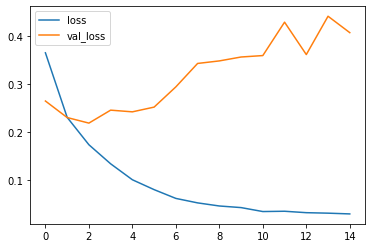

In [13]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend() # 과적합 발생

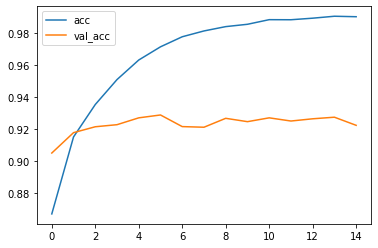

In [14]:
# Plot accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Consusion matrix, without normalization
[[865   0   8   8   4   1 106   0   8   0]
 [  1 979   1  12   1   0   3   0   3   0]
 [ 19   1 877  10  33   0  57   0   3   0]
 [ 21   1  11 905  23   0  38   0   1   0]
 [  1   1  48  15 889   0  46   0   0   0]
 [  0   0   0   0   0 988   0  10   0   2]
 [ 76   0  33  17  64   0 801   0   8   1]
 [  0   0   0   0   0   6   0 980   0  14]
 [  0   0   1   1   2   3   4   2 987   0]
 [  0   0   1   0   0   7   0  40   0 952]]


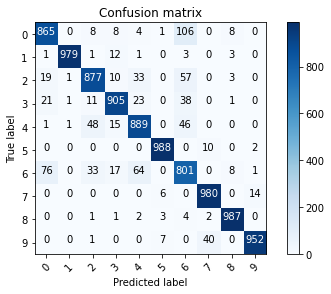

In [15]:
from sklearn.metrics import confusion_matrix
import itertools
def plt_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  '''
  This function prints and plots the confusion matrix.
  Normalization can be appled by setting `normalize=True`.
  '''
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('normalized confusion matrix')
  else:
    print('Consusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt_confusion_matrix(cm, list(range(10)))


In [16]:
# Label mapping
labels = '''T-shirt/top
Trouser 
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

Text(0.5, 1.0, 'True label: Dress, Predicted: Shirt')

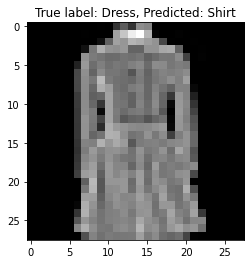

In [19]:
# 검증
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title("True label: %s, Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))